# Cardio Good Fitness Project

## Description: 
The data is from customers of the treadmill product(s) of a retail store called Cardio Good Fitness. 

### Objective: 
Preliminary Data Analysis. To explore the dataset and extract basic observation about the data. Expected tasks are as follows:
1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers


### Data Description:
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run


### Import the necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [3]:
data = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View the first few rows of the dataset

In [5]:
# looking at head (5 observations) 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observation**
The dataset looks clean and consistent with the description provided in the Data Discription.

### Check the shape of the dataset

In [6]:
df.shape

(180, 9)

* The dataset has 180 rows and 9 columns.

### Check the info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
* All columns have 180 observations consistent with the shape, thus no missing value
* Product, Gender and MaritalStatus are object data type
* Education, Usage and Fitness are of int64 data type but should be categorical variables based on the data description
* All other variables are numerical and in the correct data types (int64)

# Data Preprocessing

### Fixing the datatypes

In [8]:
# categorical column should be converted to categorical type 
df[['Education','Usage','Fitness']] = df[['Education','Usage','Fitness']].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(3), object(3)
memory usage: 9.9+ KB


* There are 3 numeric columns, 3 categorical columns and 3 object columns

### Summary of the data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


**Observations**
* There is a huge difference between the 3rd quartile and the maximum value for the age, income of customers and Miles indicating there might be outliers to the right in these variables
* Miles has a very high standard deviation which means that people's individual Miles varies largely from the mean
* The three numerical variables are rightly/postively skewed as their mean is greater than the median

**By default the describe() function shows only the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [11]:
# Check summary for non-numeric variables
df.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
Education,180,8,16,85
MaritalStatus,180,2,Partnered,107
Usage,180,6,3,69
Fitness,180,5,3,97


**Observations**
* TM195 is currently the most sold product
* Most of the customers are patnered, male and have an education level of level 16.
* Average usage of customers per week is fairly low but most customers boast of an avergae fitness

**Let's check the count of each unique category in each of the categorical variables.**

In [12]:
#Making a list of all catrgorical variables 
cat_col=['Education', 'Usage', 'Fitness']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*40)

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64
----------------------------------------
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
----------------------------------------
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
----------------------------------------


* 16, 14, and 18 are the highest Education levels

### Checking for Missing value

In [13]:
# checking missing values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing values in the data

# Exploratory Data Analysis (EDA)

### Univariate Analysis

### Let us explore the numerical variables first

In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# This helps us write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15,10)):
    """ Boxplot and histogram combined feature: 1-d feature array
        figsize: size of fig (default (9,8))
        bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # create boxplot
    sns.histplot(feature, ax=ax_hist2,edgecolor = None, kde=True) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

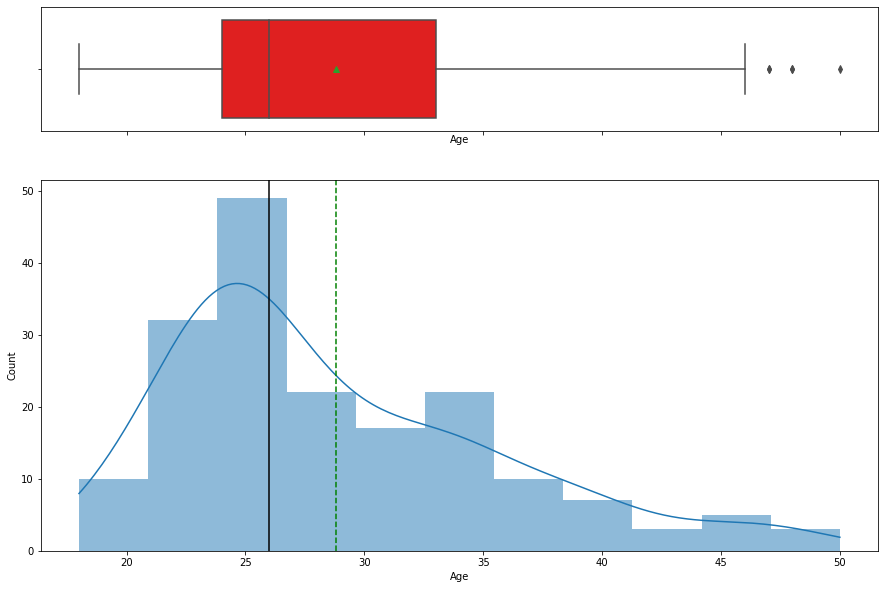

In [15]:
histogram_boxplot(df['Age'])
plt.savefig('age_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* The Age distribution of customers is highly right skewed
* Most customers are within the age of 22 and 28 
* There are a few outliers in this variable.
* Most of the customers (90 % customers) are in the age range 20 to 40.
* Few customers above age 40 ( around 10 %)


##  Observations on Income

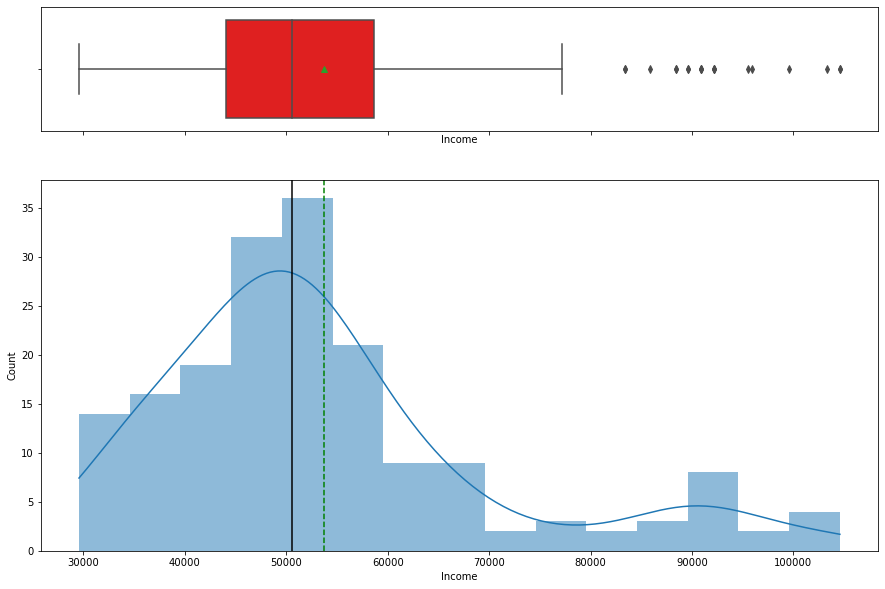

In [16]:
histogram_boxplot(df['Income'])
plt.savefig('income_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* Income of customers has a right skewed distribution with a some outliers towards the higher end.
* Income of customers is mostly between 40k and 60k
* The Income data is uniformly distributed in the IQR
* Customers are widely spread in the higher income range.

## Observations on Miles

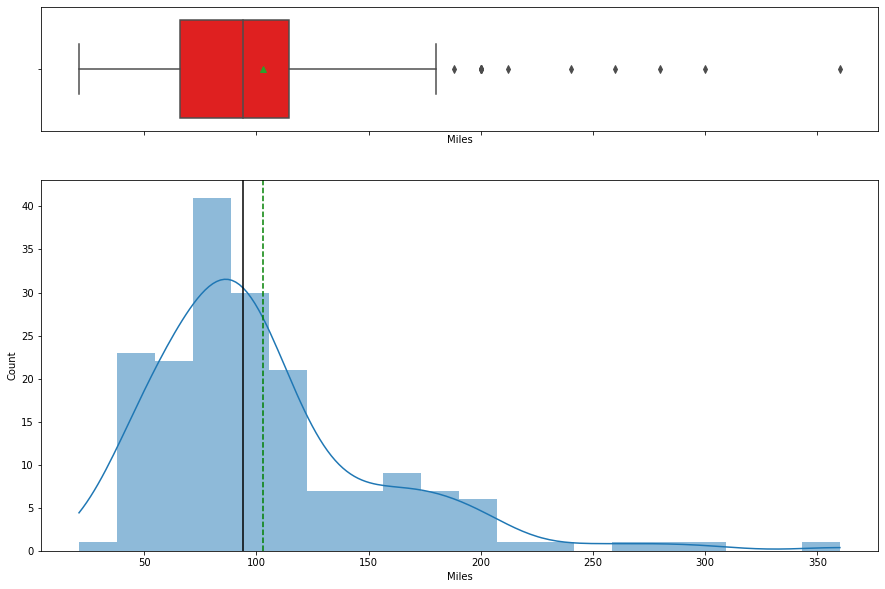

In [17]:
histogram_boxplot(df['Miles'])
plt.savefig('miles_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* Expected Miles run by customers has a right skewed distribution with some outliers towards the higher end.
* Customers are widely spread in the higher miles range.
* Some customer are planning to run more then 180 miles.
* Miles Data is uniformly distributed in IQR.

## Let's explore the categorical variables now

In [18]:
# Function to indicate percentage of each item in a countplot.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Observations on Products

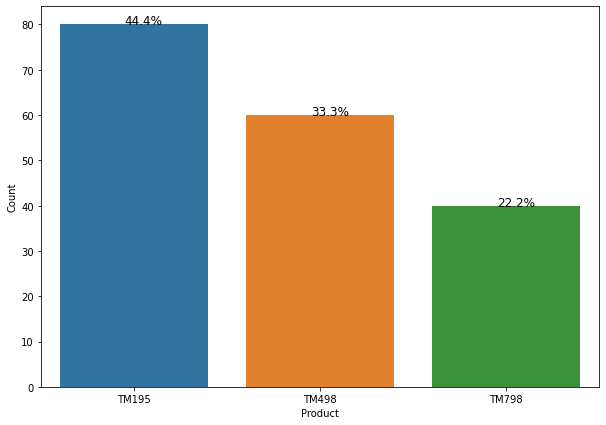

In [19]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])

plt.savefig('product_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* TM195 is most sold product with a percentage of 44.4%
* TM498 ranks second with a purchase percentage of 33.3% and TM798 with the lowest percentage of 22.2%.
* The number of customers prefering TM195 is most twice as the once prefering TM798.
* It looks like TM195 is more econamical or popular model compared to the other two models.

## Observations on Gender

In [20]:
# Coount itmes sold per Gender 
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

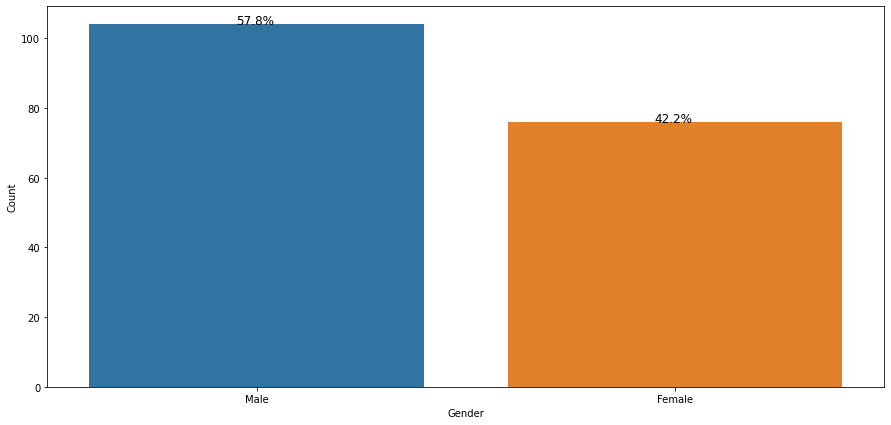

In [21]:
# Plot Gender value count
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])

plt.savefig('gender_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* 57.8% of the customers are male

## Observations on MaritalStatus

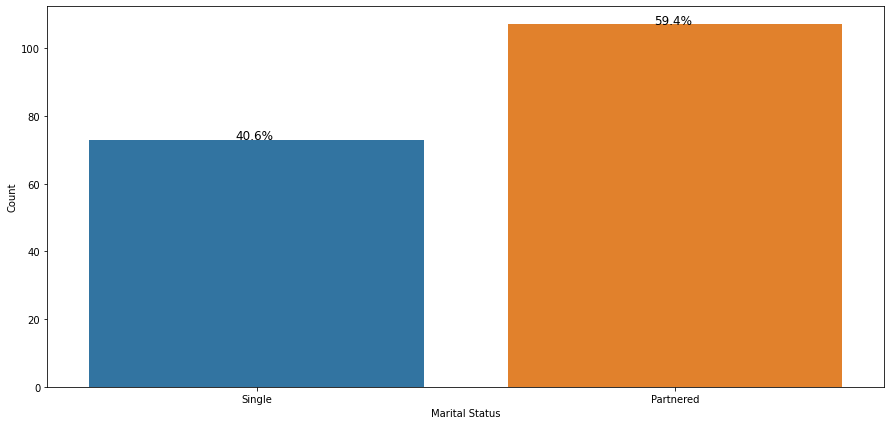

In [22]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

plt.savefig('marital_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* Majority of the customers are patnered

## Observations on Education

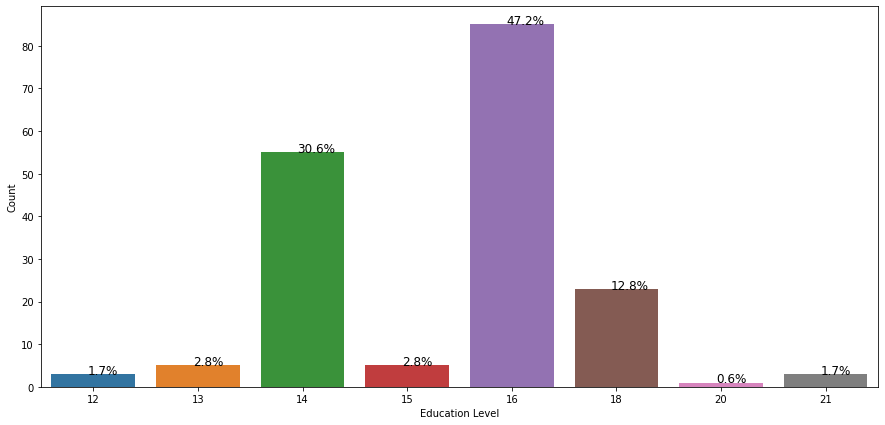

In [23]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Education'])
plt.xlabel('Education Level')
plt.ylabel('Count')
bar_perc(ax,df['Education'])

plt.savefig('education_dist.png', dpi=300, bbox_inches='tight')

**Observations**
* 16 is the most common educational level of the customers
* Over 90% pf the customers have an education level that falls with level 14, 16 or 18.
* Very few people have an education level of 20 or above

## Observations on Usage

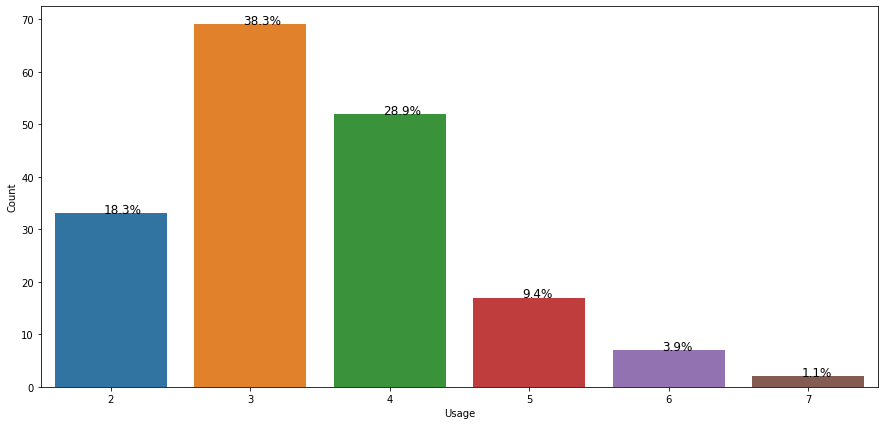

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Usage'])
plt.xlabel('Usage')
plt.ylabel('Count')
bar_perc(ax,df['Usage'])

plt.savefig('usage_dist.png', dpi=300, bbox_inches='tight')

In [25]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**Observations**
* Most of the customers only wants to use the treadmill 3 or 4 times a week.
* Very few people (only 2 actually) would like to use the treadmill daily

## Observations on Fitness

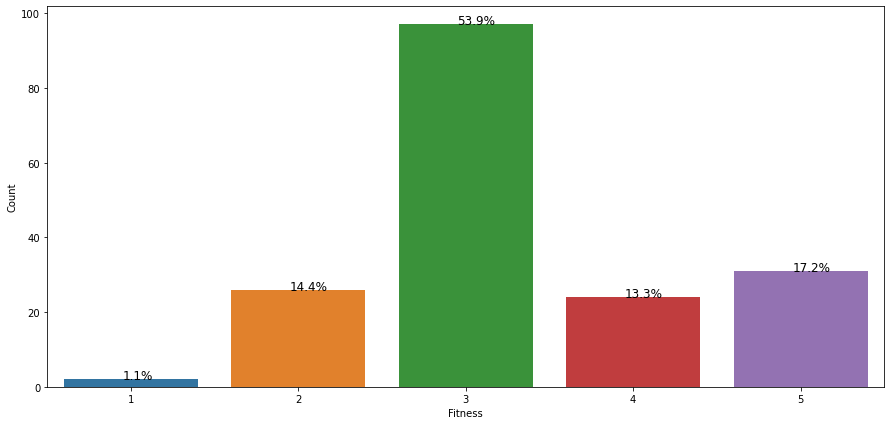

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['Fitness'])
plt.xlabel('Fitness')
plt.ylabel('Count')
bar_perc(ax,df['Fitness'])

plt.savefig('fitness_dist.png', dpi=300, bbox_inches='tight')

In [27]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

**Observations**
* Over 50% of the customers claim to be moderately fit (i.e 3)
* Only 2 customers believe that they are very unfit

## Analyse individual products

In [28]:
# Get the unique product types
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [29]:
# Count products sold per item
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [30]:
# Below code extract the product group from the whole dataset
# Get each product group data
group_data = df.groupby(df['Product'])
TM195_data = group_data.get_group('TM195')
TM498_data = group_data.get_group('TM498')
TM798_data = group_data.get_group('TM798')

### Statistical information of each product type

In [31]:
# TM195 Treadmill
TM195_data.describe()

,Age,Income,Miles
count,80.000000,80.00000,80.000000
mean,28.550000,46418.02500,82.787500
std,7.221452,9075.78319,28.874102
min,18.000000,29562.00000,38.000000
25%,23.000000,38658.00000,66.000000
50%,26.000000,46617.00000,85.000000
75%,33.000000,53439.00000,94.000000
max,50.000000,68220.00000,188.000000


In [32]:
# TM498 Treadmill
TM498_data.describe()

,Age,Income,Miles
count,60.000000,60.000000,60.000000
mean,28.900000,48973.650000,87.933333
std,6.645248,8653.989388,33.263135
min,19.000000,31836.000000,21.000000
25%,24.000000,44911.500000,64.000000
50%,26.000000,49459.500000,85.000000
75%,33.250000,53439.000000,106.000000
max,48.000000,67083.000000,212.000000


In [33]:
# TM798 Treadmill
TM798_data.describe()

,Age,Income,Miles
count,40.000000,40.00000,40.000000
mean,29.100000,75441.57500,166.900000
std,6.971738,18505.83672,60.066544
min,22.000000,48556.00000,80.000000
25%,24.750000,58204.75000,120.000000
50%,27.000000,76568.50000,160.000000
75%,30.250000,90886.00000,200.000000
max,48.000000,104581.00000,360.000000


### Relationship between Products and Age of the customers

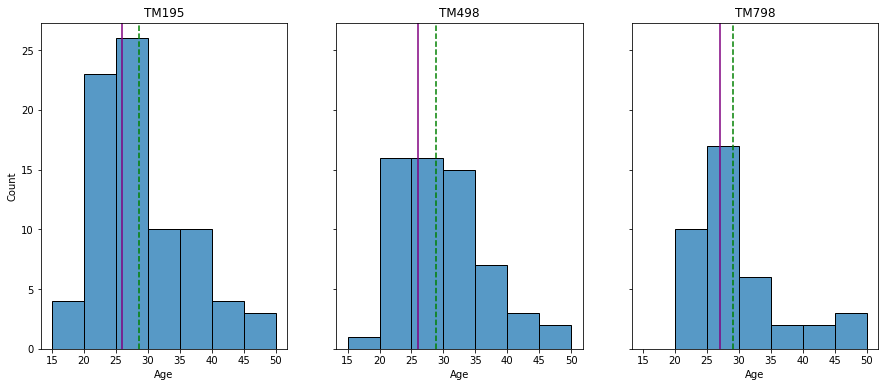

In [34]:
# plot an histogram to show the distribution of each products by age
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    
bins = [15,20,25,30,35,40,45,50] # Specify bins

# TM195
sns.histplot(ax=axes[0], data=TM195_data, bins=bins, x='Age')
axes[0].set_title('TM195')
axes[0].axvline(np.mean(TM195_data['Age']), color='g', linestyle='--') # Add mean to the histogram
axes[0].axvline(np.median(TM195_data['Age']), color='purple', linestyle='-') # Add median to the histogram

# TM498
sns.histplot(ax=axes[1], data=TM498_data, bins=bins,x='Age')
axes[1].set_title('TM498')
axes[1].axvline(np.mean(TM498_data['Age']), color='g', linestyle='--') # Add mean to the histogram
axes[1].axvline(np.median(TM498_data['Age']), color='purple', linestyle='-') # Add median to the histogram

# TM798
sns.histplot(ax=axes[2], data=TM798_data, bins=bins,x='Age')
axes[2].set_title('TM798')
axes[2].axvline(np.mean(TM798_data['Age']), color='g', linestyle='--') # Add mean to the histogram
axes[2].axvline(np.median(TM798_data['Age']), color='purple', linestyle='-') # Add median to the histogram

plt.show()

**Observations**
* Majority of the customers for each product (TM195, TM498, TM798) are in the 20 to 30 age group
* This means we can't determine the preference of the customers based on their age

### Relationship between Products and Gender

In [35]:
# Crosstab helps count the frequency of categorical data
pd.crosstab(index=df['Product'],columns=df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


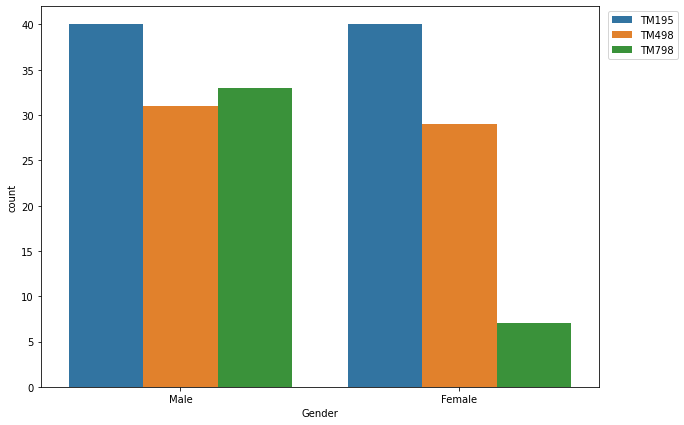

In [36]:
# visulaize the relationship between the Products and gender
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,x='Gender',hue='Product')
plt.legend(bbox_to_anchor=(1.15, 1))
plt.show()

**Observations**
* TM195 are bought by equal number of male and female customers.
* TM798 are bought by more number of male customer then female customers.
* The number of male and female does not varry much between the products.
* Gender is not great predictor for the preference of the customer.

### Relationship between Products and Education

In [37]:
# Crosstab helps count the frequency of categorical data
pd.crosstab(df['Product'],df['Education'] )

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
TM195,2,3,30,4,39,2,0,0
TM498,1,2,23,1,31,2,0,0
TM798,0,0,2,0,15,19,1,3


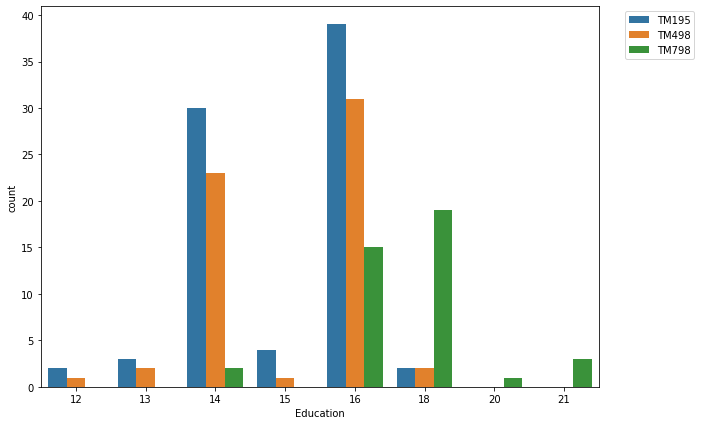

In [38]:
# Plot of the relationship for better visualization
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,x='Education',hue='Product')
plt.legend(bbox_to_anchor=(1.18, 1))
plt.show()

**Observations**
* Customer with education of 16 years are the gretest buyer of the product.
* TM195 and TM498 are mostly purchased by customers with Education level 16 or 14 
* TM798 is mostly purchased by customers with Education level 18 or 16 
* Education is not best predictor of customer preference.

### Relationship between Products and MaritalStatus

In [39]:
# Crosstab helps count the frequency of categorical data
pd.crosstab(df['Product'],df['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


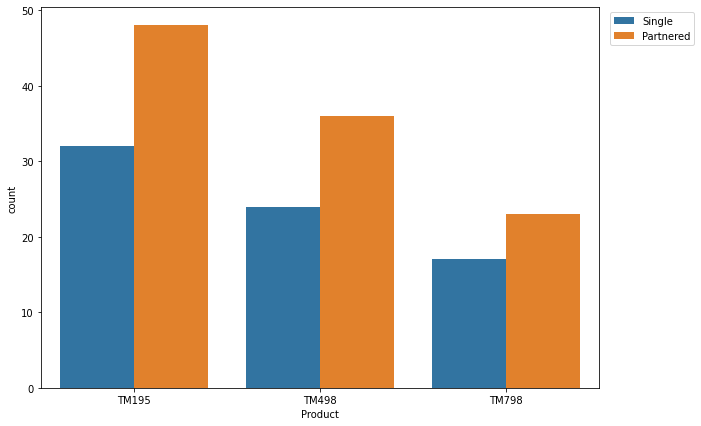

In [40]:
# Plot of the relationship for better visualization
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.legend(bbox_to_anchor=(1.18, 1))
plt.show()

**Observations**
* All the products are mostly purchased by Partnered customers 

### Relationship between Products and Usage

In [41]:
# Crosstab helps count the frequency of categorical data
pd.crosstab(df['Product'],df['Usage'] )

Usage,2,3,4,5,6,7
Product,,,,,,
TM195,19,37,22,2,0,0
TM498,14,31,12,3,0,0
TM798,0,1,18,12,7,2


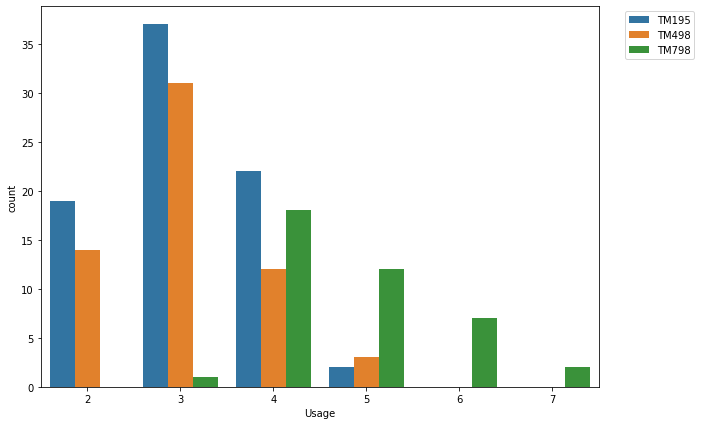

In [42]:
# Plot of the relationship for better visualization
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,x='Usage',hue='Product')
plt.legend(bbox_to_anchor=(1.18, 1))

plt.savefig('products_by_usage.png', dpi=300, bbox_inches='tight')
plt.show()

**Observations**
* TM195 and TM498 are purchased by customers planning to use it for 2 to 5 times a week.
* TM798 is purchased by customers planning to use it for 3 to 7 times a week.
* TM195 and TM498 are preferred by customer who are planning to use moderately.
* TM798 are prefered by customers who planning a heavy usges.

In [43]:
# Average usage per product
# Convert categorical data back to float and then use the .mean() to get the average
print('Average usage of TM195 products : {}'.format(np.round(TM195_data['Usage'].astype('float').mean(),0)))
print('Average usage of TM498 products : {}'.format(np.round(TM498_data['Usage'].astype('float').mean(),0)))
print('Average usage of TM798 products : {}'.format(np.round(TM798_data['Usage'].astype('float').mean(),0)))

Average usage of TM195 products : 3.0
Average usage of TM498 products : 3.0
Average usage of TM798 products : 5.0


### Relationship between Products and Fitness

In [44]:
# Crosstab helps count the frequency of categorical data
pd.crosstab(df['Product'],df['Fitness'] )

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


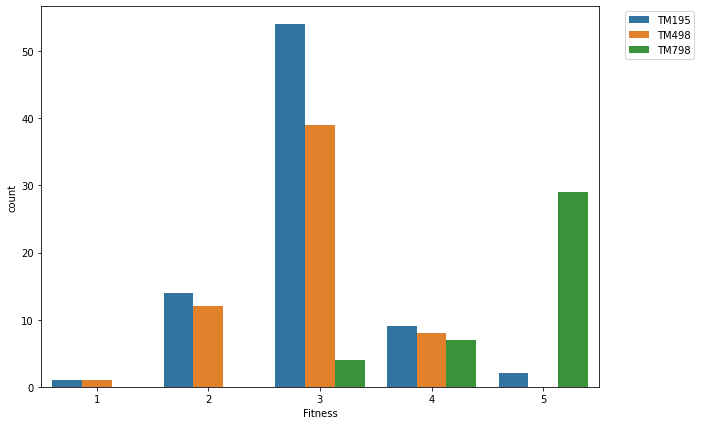

In [45]:
# Plot of the relationship for better visualization
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df,x='Fitness',hue='Product')
plt.legend(bbox_to_anchor=(1.18, 1))

plt.savefig('products_by_fitness.png', dpi=300, bbox_inches='tight')
plt.show()

**Observations**
* TM195 is used by customers whose self rated fitness is between 1 to 5.
* TM498 is used by customers whose self rated fitness is between 1 to 4.
* TM798 is used by customers whose self rated fitness is between 3 to 5.
* TM195 and TM498 are bought by customers of varied fitness level.
* Most of the customers have rated themselves with moderate to high fightness.
* TM798 are who rated themselves with high fitness.

In [46]:
# Average Fitness per product
# Convert categorical data back to float and then use the .mean() to get the average
print('Average Fitness of TM195 Users : {}'.format(np.round(TM195_data['Fitness'].astype('float').mean(),0)))
print('Average Fitness of TM498 Users : {}'.format(np.round(TM498_data['Fitness'].astype('float').mean(),0)))
print('Average Fitness of TM798 Users : {}'.format(np.round(TM798_data['Fitness'].astype('float').mean(),0)))

Average Fitness of TM195 Users : 3.0
Average Fitness of TM498 Users : 3.0
Average Fitness of TM798 Users : 5.0


### Relationship between Products and Income of the customers

In [47]:
# Average Income of customer per product
print('Average Income of TM195 Customer : {}'.format(np.round(TM195_data['Income'].mean(),2)))
print('Average Income of TM498 Customer : {}'.format(np.round(TM498_data['Income'].mean(),2)))
print('Average Income of TM798 Customer : {}'.format(np.round(TM798_data['Income'].mean(),2)))

print('-------------------------------------')
# Average Income of customer per product
print('Median Income of TM195 Customer : {}'.format(np.round(TM195_data['Income'].median(),2)))
print('Median Income of TM498 Customer : {}'.format(np.round(TM498_data['Income'].median(),2)))
print('Median Income of TM798 Customer : {}'.format(np.round(TM798_data['Income'].median(),2)))

Average Income of TM195 Customer : 46418.02
Average Income of TM498 Customer : 48973.65
Average Income of TM798 Customer : 75441.58
-------------------------------------
Median Income of TM195 Customer : 46617.0
Median Income of TM498 Customer : 49459.5
Median Income of TM798 Customer : 76568.5


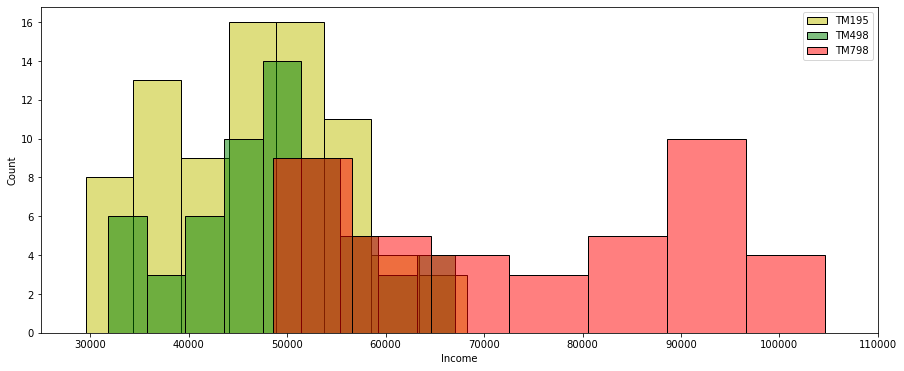

In [48]:
# Plot the above distribution on top of each other for better visualization
plt.figure(figsize=(15,6))
sns.histplot(data=TM195_data, x='Income', color='y',alpha=0.5)
sns.histplot(data=TM498_data, x='Income', color='g',alpha=0.5)
sns.histplot(data=TM798_data, x='Income', color='r',alpha=0.5)
plt.xlim(25000,110000,10000)
plt.legend(['TM195','TM498','TM798'])

plt.savefig('products_by_income.png', dpi=300, bbox_inches='tight')

plt.show()

**Observations**
* TM195 is bought by people whose income ranges from 29k to 68k.
* TM498 is bought by people whose income ranges from 32k to 67k.
* TM798 is bought by people whose income ranges from 48k to 105k
* TM195 is low cost as compared to other models.
* TM498 is also in lower price range.
* TM798 is an expensive model compared to other.
* Income range is a good predictor in finding the prefernce the customers.

### Relationship between Products and Miles run by the customers

In [49]:
# Average Miles per product
print('Average Miles run by TM195 products : {}'.format(np.round(TM195_data['Miles'].mean(),0)))
print('Average Miles run by TM498 products : {}'.format(np.round(TM498_data['Miles'].mean(),0)))
print('Average Miles run by TM798 products : {}'.format(np.round(TM798_data['Miles'].mean(),0)))

Average Miles run by TM195 products : 83.0
Average Miles run by TM498 products : 88.0
Average Miles run by TM798 products : 167.0


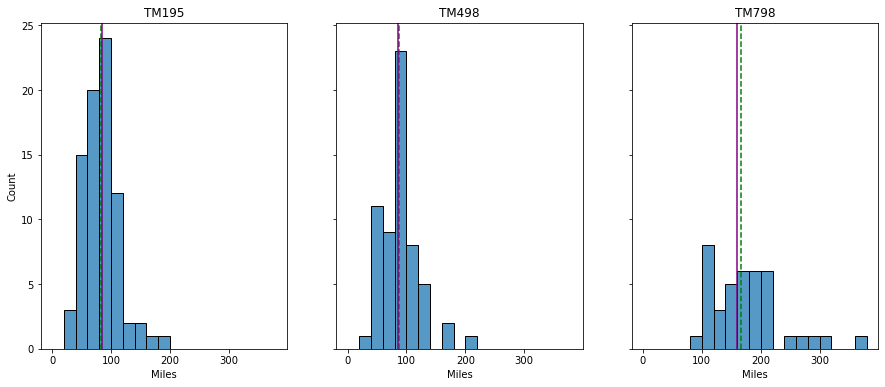

In [50]:
# plot an histogram to show the distribution of the products by Miles run by the customers
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

bins = range(0,400,20) # Set bins

# TM195
sns.histplot(ax=axes[0], data=TM195_data,bins=bins, x='Miles')
axes[0].set_title('TM195')
axes[0].axvline(np.mean(TM195_data['Miles']), color='g', linestyle='--') # Add mean to the histogram
axes[0].axvline(np.median(TM195_data['Miles']), color='purple', linestyle='-') # Add median to the histogram

# TM498
sns.histplot(ax=axes[1], data=TM498_data, bins=bins, x='Miles')
axes[1].set_title('TM498')
axes[1].axvline(np.mean(TM498_data['Miles']), color='g', linestyle='--') # Add mean to the histogram
axes[1].axvline(np.median(TM498_data['Miles']), color='purple', linestyle='-') # Add median to the histogram

# TM798
sns.histplot(ax=axes[2], data=TM798_data, bins=bins, x='Miles')
axes[2].set_title('TM798')
axes[2].axvline(np.mean(TM798_data['Miles']), color='g', linestyle='--') # Add mean to the histogram
axes[2].axvline(np.median(TM798_data['Miles']), color='purple', linestyle='-') # Add median to the histogram

plt.show()

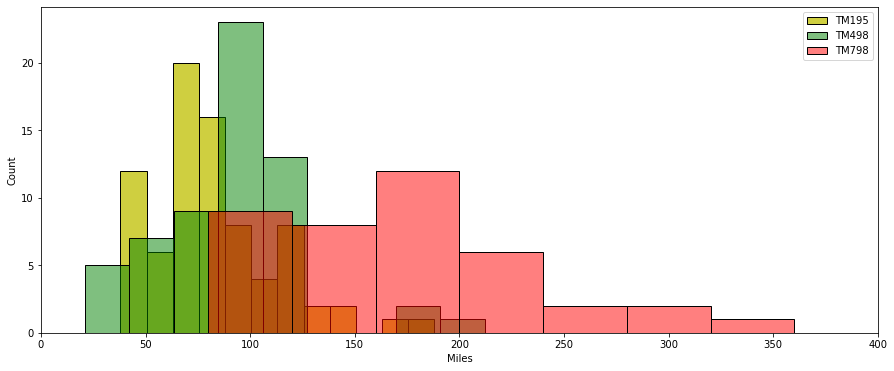

In [51]:
# Plot the above distribution on top of each other for better visualization
plt.figure(figsize=(15,6))
sns.histplot(data=TM195_data, x='Miles', color='y')
sns.histplot(data=TM498_data, x='Miles', color='g',alpha=0.5)
sns.histplot(data=TM798_data, x='Miles', color='r',alpha=0.5)
plt.xlim(0,400,50)
plt.legend(['TM195','TM498','TM798'])

plt.savefig('products_by_miles.png', dpi=300, bbox_inches='tight')
plt.show()

**Observations**
* TM195 is bought by people who are planning to run upto 180 miles.
* TM498 is bought by people who are planning to run upto 220 miles.
* TM798 is bought by people who are planning to run upto 360 miles.
* TM195 is a low end model, used by beginners and non-professional.
* TM498 is a mediam range model.
* TM798 is a high end model preferred by people planning to run more number of miles.
* Based on the number of miles a user is planning to run, We can predict preference of customers.

## Bivariate Analysis

### Relationship Between Age and Miles

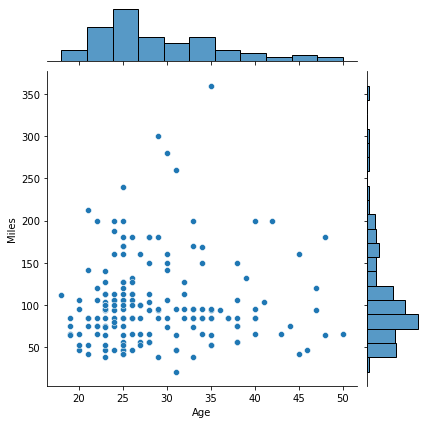

In [52]:
# We can use the jointplot to plot two numerical variables against each other 
# Jointplot shows both the histogram and scatterplot of the variabls
sns.jointplot(x = 'Age', y = 'Miles', data = df);

**Observations** : There is no observable pattern between Age and Miles

### Relationship Between Age and Income

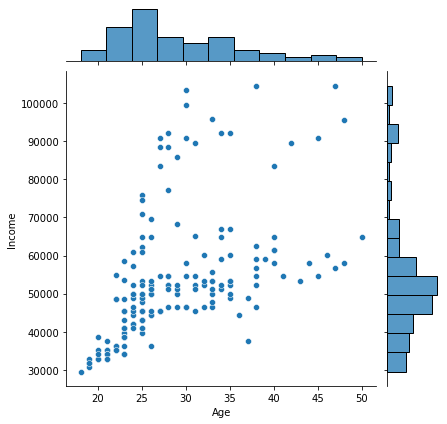

In [53]:
# Use Joint plot to plot the relationship 
sns.jointplot(x = 'Age', y = 'Income', data = df);

**Observations** : There is some observable correlation between the Age and Income of customers

### Relationship Between Income and Miles

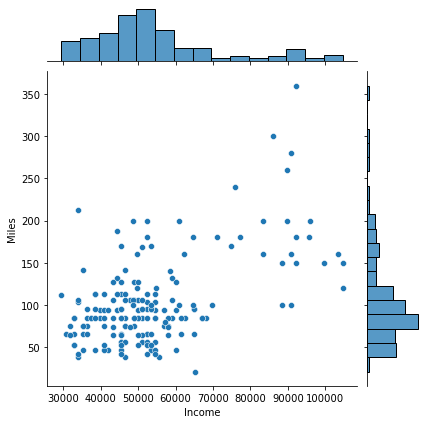

In [54]:
# Use Joint plot to plot the relationship 
sns.jointplot(x = 'Income', y = 'Miles', data = df);

**Observations** : 
* There is a slight positive correlation between income and miles. 
* Might be due to the fact that the high income people are buying TM798 model which has higher range of miles

### Relationship between Gender and Income

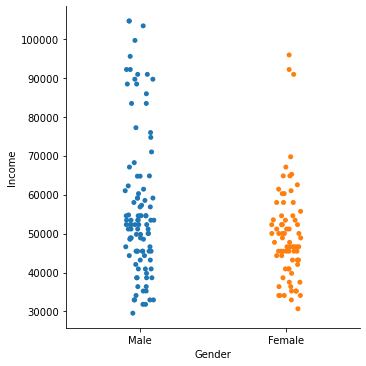

In [55]:
# We can use the catplot to plot the relationship between a categorical variable(Gender) and a numerical variable
sns.catplot(x = 'Gender', y = 'Income', data = df);

**Observations** : Male customers have higher Income than the Female customers

### Relationship between MaritalStatus and Miles

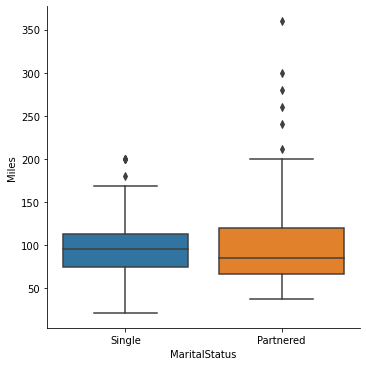

In [56]:
# We can use the box kind from catplot to visualize the relationship between MaritalStatus and Miles
sns.catplot(x = 'MaritalStatus', y = 'Miles', data = df, kind='box');

**Observations** : Patenered customers run more miles than single customeres.

## Multivariate Analysis

### Relationship between Products and all the variables

In [57]:
# Average of each variable per the product type
data.groupby('Product').mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


**Observations**
* This confirm some of our initial discovery that TM798 are usually purchased by high usage customers, with high income and higher fitness
* While TM498 & TM798 are purchased by low usage customers

### Relationship between Products, Miles and Gender

<Figure size 720x432 with 0 Axes>

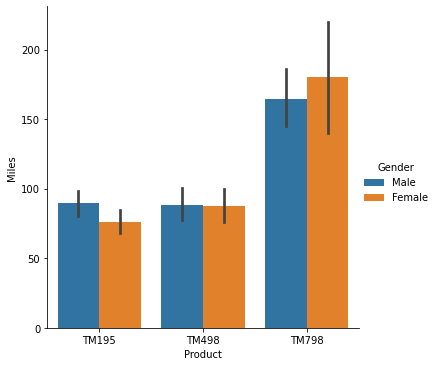

In [58]:
plt.figure(figsize=(10,6))
sns.catplot(x = "Product", y = 'Miles', hue = 'Gender', data = df, kind = 'bar')
plt.show()

**Observations**
* TM195 : average planned miles male = 90 ; female = 75.
* TM498 : average planned miles male = 90 ; female = 90.
* TM798 : average planned miles male = 160 ; female = 175.
* Mostly male and female are planning to run equally.
* Average planned number of miles run by user of TM195 and TM498 are almost similar.
* Average planned number of miles run by user of TM798 is in the high range.

### Pairplots

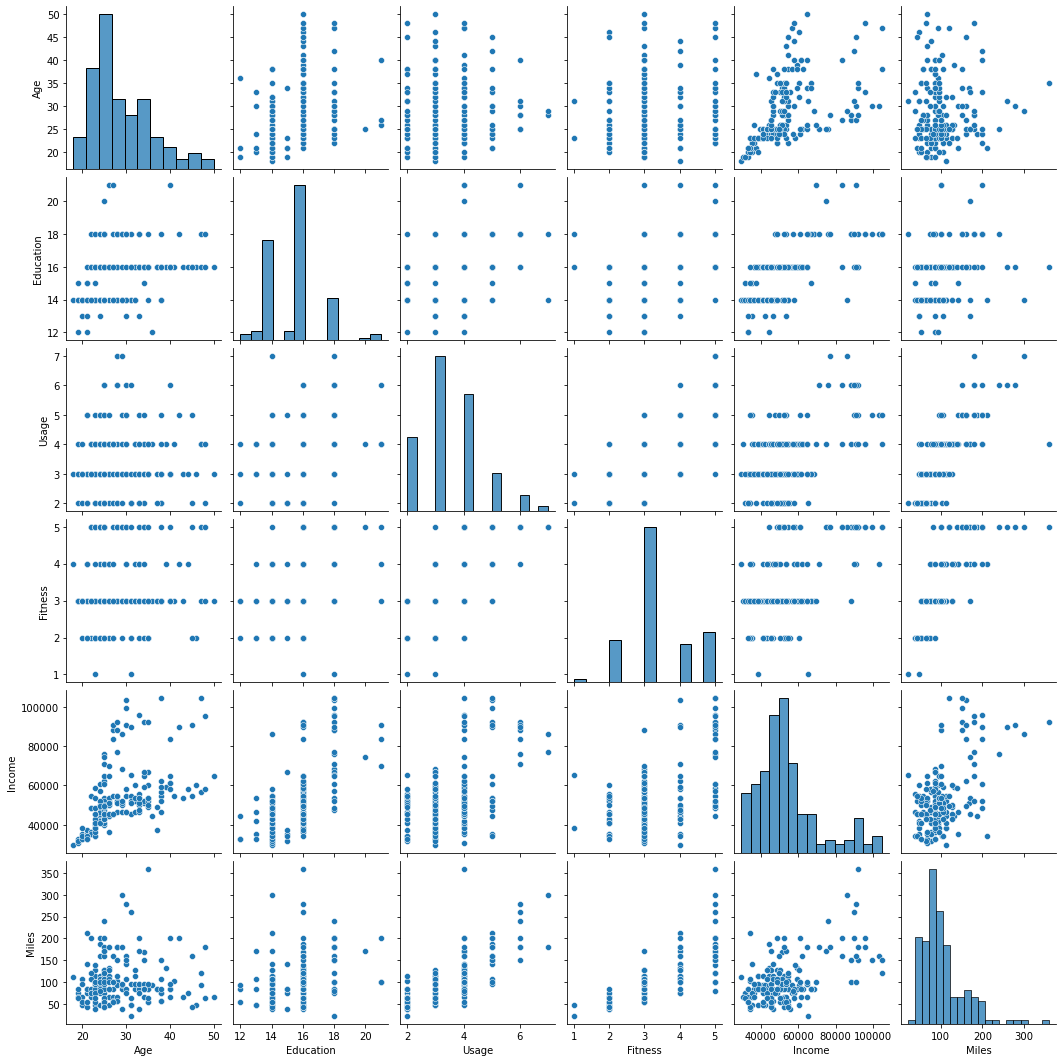

In [59]:
# Pairplot helps plot the relationship between all the variables 
sns.pairplot(data)
plt.show()

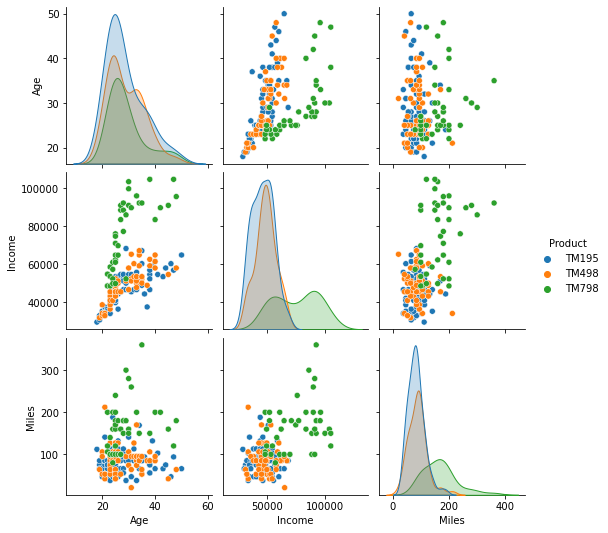

In [60]:
# Plot a pairplot of the numerical variables seperated by the products
sns.pairplot(df, hue = 'Product');

### Correlation

In [61]:
# Find the pearson correlation between the variables
corr = data.corr();
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


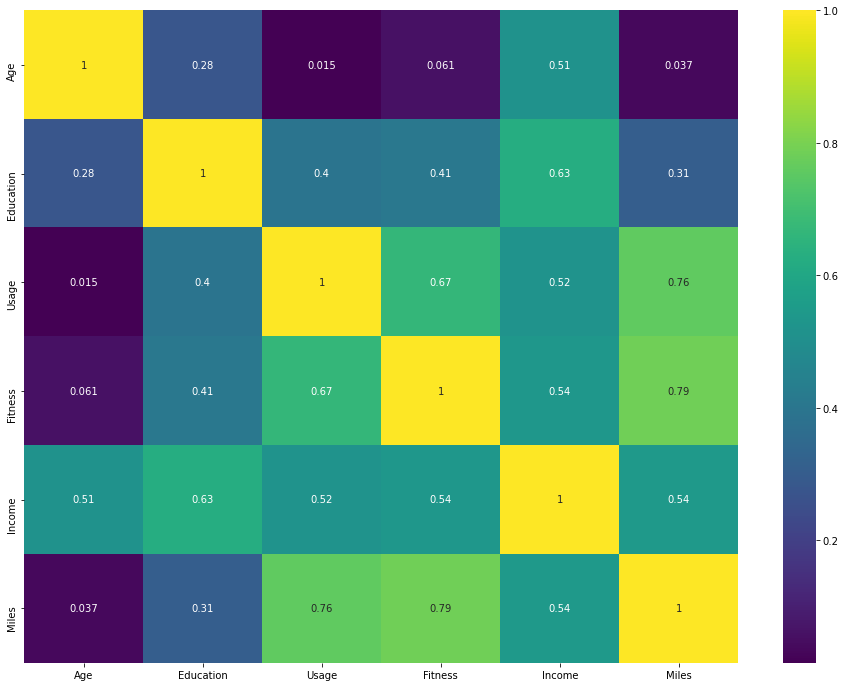

In [62]:
# Use heatmap to visualize the correlation
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='viridis')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

**Observations**
* High correlation between the Miles and Usage
* High correlation between the Miles and Fitness
* High correlation between the Income and Education
* High correlation between the Fitness and Usage

In [63]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

## Conclusion

**Summary**
1. TM195 is the most economic choice for beginners 
2. TM798 is an expert level fitness choice  
3. TM498 and TM798 customer characteristics does not vary that much

We also observd the following about each product type:

**TM195:**
* TM195 is the most popular product
* TM195 is prefered  among customers with lower income range, fitness level less then equal to 3 and usage less then 4 times in a week.
* TM195 is bought by people who are not planning to above 180 miles.

**TM498**
* This is next in rank to TM195 in terms of popularity
* It also caters for customers with lower income but moderate fitness level

**TM798**
* This is the least sold product
* It's high end and prefered among customers with higher income range, fitness level above 4 and regular usage of more than 4 times a week.
* TM798 is a high end model preferred by people planning to run more number of miles.